# Extracting Coordinate of Points on an Image of a Graph

## Explanation

![plot image](Vostok-ice-core-petit.png)

There are three series on the graph. Each is red, green, and blue respectively. Each has its own y axis. They share the same x axis.

## Strategy

1. Extract red, green, and blue pixels from the image
2. Transform the coordinate of each pixel to fit the x and y axis on the graph
3. Plot the coordinates to validate the process
4. Save the coordinates as a csv file

In [1]:
import numpy as np
from PIL import Image

# Open image and make RGB and HSV versions
RGBim = Image.open("Vostok-ice-core-petit.png").convert('RGB')
HSVim = RGBim.convert('HSV')

# Make numpy versions
RGBna = np.array(RGBim)
HSVna = np.array(HSVim)

In [2]:
def get_filter_certain_color(img, target_h, width):
    """get an array of pixels of a given color in an image

    Args:
        img (np.array): given image
        target_h (int): a hue (color) for which pixels are filtered
        width (int): tolerance for `target_h` 

    Returns:
        np.array: coordinates of pixels of the given color
    """    
    h = HSVna[:,:,0]
    s = HSVna[:,:,1]
    v = HSVna[:,:,2]
    # The hue of white is 0 which is the same as red. so avoid it
    not_white = s > 0.05
    # lower and upper limit
    lower = int((target_h - width // 2) * 255 / 360)
    upper = int((target_h + width // 2) * 255 / 360)
    if lower < 0: # if the range goes over hue=0
        return np.where(((h > lower + 255) | (h < upper)) & not_white)
    else:
        return np.where(((h > lower) & (h < upper)) & not_white)

In [3]:
# pixels for each color
red = get_filter_certain_color(HSVna, 0, 20) # dust
green = get_filter_certain_color(HSVna, 120, 20) # co2
blue = get_filter_certain_color(HSVna, 240, 20) # temperature

In [8]:
# (x coordinate, y coordinate)
upperleft = (50,12)
lowerright = (542, 395)

# (value on axis, x coordinate, y coordinate)
time = ((0, 50, 395), (400, 513, 395)) # thousands of years ago from now
temp = ((-6, 50, 165), (4, 50, 12)) # temperature in celcius
dust = ((0.3, 50, 372), (1.5, 50, 277)) # aerosol concentration 
co2 = ((200, 542, 279), (280, 542, 155)) # co2 concentration

In [9]:
def transform_x(x):
    return (x - time[0][1]) / (time[1][1] - time[0][1]) * (time[1][0] - time[0][0])

def transform_y_temp(y):
    return (y - temp[0][2]) / (temp[1][2] - temp[0][2]) * (temp[1][0] - temp[0][0]) + temp[0][0]

def transform_y_dust(y):
    return (y - dust[0][2]) / (dust[1][2] - dust[0][2]) * (dust[1][0] - dust[0][0]) + dust[0][0]

def transform_y_co2(y):
    return (y - co2[0][2]) / (co2[1][2] - co2[0][2]) * (co2[1][0] - co2[0][0]) + co2[0][0]

dat_temp = (transform_x(blue[1]), transform_y_temp(blue[0]))
dat_dust = (transform_x(red[1]), transform_y_dust(red[0]))
dat_co2 = (transform_x(green[1]), transform_y_co2(green[0]))

In [10]:
def sort_dat(dat):
    # sort dat
    x = dat[0]; y = dat[1]
    args = np.argsort(dat[0])
    return x[args], y[args]

In [11]:
import matplotlib.pyplot as plt

def plot_dat(dat, label):
    xy = sort_dat(dat)
    plt.plot(xy[0], xy[1], '-')
    plt.title(label)

Next, the data were plotted to validate the process.

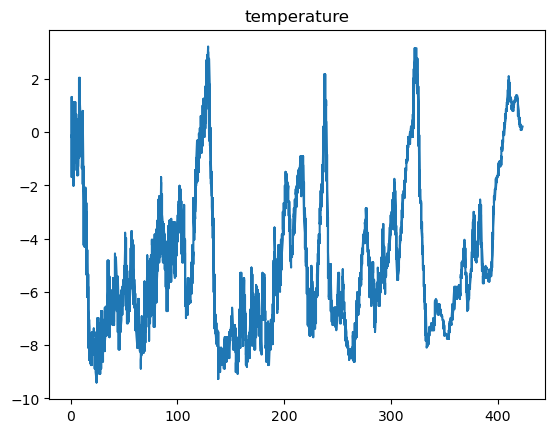

In [15]:
plot_dat(dat_temp, 'temperature')

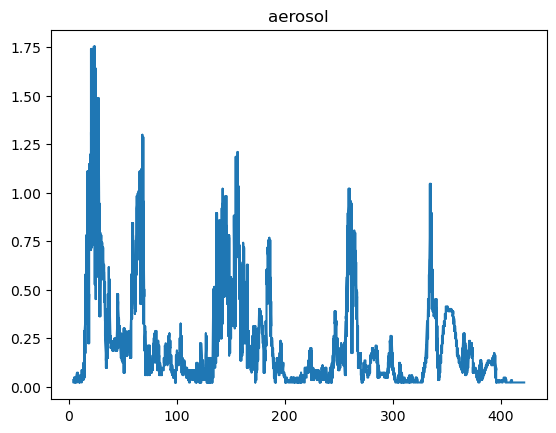

In [13]:
plot_dat(dat_dust, 'aerosol')

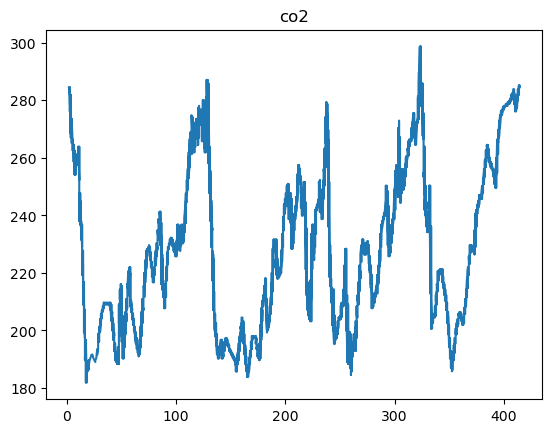

In [14]:
plot_dat(dat_co2, 'co2')

In [88]:
# Save the result

def save_dat_csv(dat, path):
    arr = np.array(sort_dat(dat)).T
    np.savetxt(path, arr, delimiter=',')

save_dat_csv(dat_temp, './dat_temp.csv')
save_dat_csv(dat_dust, './dat_dust.csv')
save_dat_csv(dat_co2, './dat_co2.csv')